# Tarea Parte 2

In [1]:
import os

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tag import StanfordPOSTagger

from wordcloud import WordCloud

import spacy
from spacy import displacy
import es_core_news_md

from pymongo import MongoClient

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
jar = "./pos-tagger/stanford-postagger/stanford-postagger-4.2.0.jar"
model = "./pos-tagger/stanford-postagger/models/spanish-ud.tagger"
os.environ["JAVAHOME"] = "/usr/bin/java"

In [3]:
nlp = es_core_news_md.load()

In [4]:
client = MongoClient("localhost", 27017)
db = client["tareaespectador"]
collectione = db["economia"]
collectioni = db["investigacion"]
collectionj = db["judicial"]
collectionp = db["politica"]
collectiont = db["tecnologia"]

In [5]:
text = []
for tareanews in list(collectione.find({}, {"Categoria": 1, "Autor": 1, "Titulo": 1, "Texto": 1, "Fecha": 1, "_id": 0})):
    text.append(tareanews["Categoria"])
    text.append(tareanews["Autor"])
    text.append(tareanews["Titulo"])
    text.append(tareanews["Texto"])
    text.append(tareanews["Fecha"])
    
texti = []
for tareanews in list(collectioni.find({}, {"Categoria": 1, "Autor": 1, "Titulo": 1, "Texto": 1, "Fecha": 1, "_id": 0})):
    texti.append(tareanews["Categoria"])
    texti.append(tareanews["Autor"])
    texti.append(tareanews["Titulo"])
    texti.append(tareanews["Texto"])
    texti.append(tareanews["Fecha"])
    
textj = []
for tareanews in list(collectionj.find({}, {"Categoria": 1,"Autor": 1, "Titulo": 1, "Texto": 1, "Fecha": 1, "_id": 0})):
    textj.append(tareanews["Categoria"])
    textj.append(tareanews["Autor"])
    textj.append(tareanews["Titulo"])
    textj.append(tareanews["Texto"])
    textj.append(tareanews["Fecha"])
    
textp = []
for tareanews in list(collectionp.find({}, {"Categoria": 1,"Autor": 1, "Titulo": 1, "Texto": 1, "Fecha": 1, "_id": 0})):
    textp.append(tareanews["Categoria"])
    textp.append(tareanews["Autor"])
    textp.append(tareanews["Titulo"])
    textp.append(tareanews["Texto"])
    textp.append(tareanews["Fecha"])
    
textt = []
for tareanews in list(collectiont.find({}, {"Categoria": 1,"Autor": 1, "Titulo": 1, "Texto": 1, "Fecha": 1, "_id": 0})):
    textt.append(tareanews["Categoria"])
    textt.append(tareanews["Autor"])
    textt.append(tareanews["Titulo"])
    textt.append(tareanews["Texto"])
    textt.append(tareanews["Fecha"])

In [6]:
text = " ".join(text)
texti = " ".join(texti)
textj = " ".join(textj)
textp = " ".join(textp)
textt = " ".join(textt)

In [7]:
words = word_tokenize(text)
wordsi = word_tokenize(texti)
wordsj = word_tokenize(textj)
wordsp = word_tokenize(textp)
wordst = word_tokenize(textt)

In [8]:
frec_dist = FreqDist(words)
frec_disti = FreqDist(wordsi)
frec_distj = FreqDist(wordsj)
frec_distp = FreqDist(wordsp)
frec_distt = FreqDist(wordst)

In [9]:
stop_words = set(stopwords.words("spanish"))
stop_wordsi = set(stopwords.words("spanish"))
stop_wordsj = set(stopwords.words("spanish"))
stop_wordsp = set(stopwords.words("spanish"))
stop_wordst = set(stopwords.words("spanish"))

In [10]:
filtered_words = []

for w in words:
    if w.lower() not in stop_words:
        filtered_words.append(w)
        
filtered_wordsi = []

for wi in wordsi:
    if wi.lower() not in stop_wordsi:
        filtered_wordsi.append(wi)
        
filtered_wordsj = []

for wj in wordsj:
    if wj.lower() not in stop_wordsj:
        filtered_wordsj.append(wj)
        
filtered_wordsp = []

for wp in wordsp:
    if wp.lower() not in stop_wordsp:
        filtered_wordsp.append(wp)
        
filtered_wordst = []

for wt in wordst:
    if wt.lower() not in stop_wordst:
        filtered_wordst.append(wt)

In [11]:
frec_dist_filtered = FreqDist(filtered_words)
frec_dist_filteredi = FreqDist(filtered_wordsi)
frec_dist_filteredj = FreqDist(filtered_wordsj)
frec_dist_filteredp = FreqDist(filtered_wordsp)
frec_dist_filteredt = FreqDist(filtered_wordst)

In [12]:
#Economia
text

'Economia Redacción Emprendimiento y liderazgo Ellos crearon una marca de diseño ilustrado dedicada a hacer objetos de papel “Creo que cada proyecto tiene sus tiempos y necesidades. Que aunque parezca muy difícil, es un trabajo de insistir y no quedarse quieto y ver salidas desde la creatividad... desde ángulos diferentes. Siento que mi pensamiento como artista funciona para eso. Pero a la vez, se necesita quien le dé piso y mente estructurada a la hora de hablar de finanzas y administración. Por ejemplo, justo en el momento en que nuestro proyecto creció de forma más fuerte, fue en plena cuarentena, paradójicamente. Encerrado en casa empecé a hacer unas ilustraciones de los animales que salieron a las calles, y vimos la oportunidad de hacer de ello un libro para colorear, que resultó ser un producto idóneo para el momento en que las personas buscaban qué hacer”. Por eso, en entrevista para nuestra sección 23 preguntas para emprendedores y sus emprendimientos, hablamos con Alejandro Us

In [13]:
frec_dist_filtered.most_common(10)

[(',', 279),
 ('.', 188),
 ('?', 43),
 (':', 25),
 ('%', 25),
 ('“', 22),
 ('”', 21),
 ('Rusia', 18),
 ('hacer', 14),
 ('¿Qué', 13)]

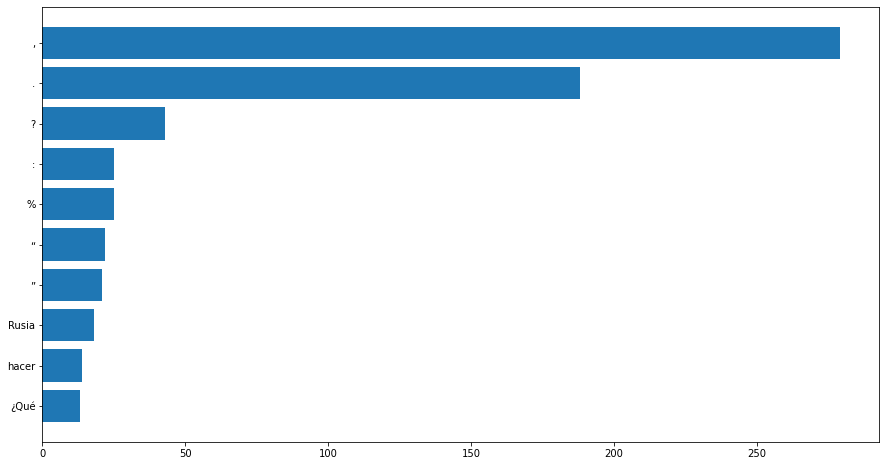

In [14]:
n = 10

plt.figure(figsize = (15, 8))
plt.barh([ w[0] for w in frec_dist_filtered.most_common(n) ], [ w[1] for w in frec_dist_filtered.most_common(n) ])
plt.gca().invert_yaxis()

In [15]:
document = nlp(text)
displacy.render(document, style = "ent")

In [16]:
#Investigacion
texti

'Investigacion Nicolás Achury González “Los Hijos del Tambor”: música y tradición en San Basilio de Palenque Entre cantos, bailes y tambores, vive la población de San Basilio de Palenque. En este corregimiento del departamento de Bolívar, Colombia, persisten tradiciones culturales de raíces africanas que se remontan a la Colonia y a las luchas cimarronas contra el sistema esclavista, por ello es considerado “el primer pueblo libre de América”. (Le puede interesar: “Las palenqueras ya no se ven en el día a día cartagenero”: historiador) La música y el tambor han sido formas de expresión de libertad, elementos transversales a la identidad palenquera que junto con otras formas culturales ayudaron a que fuera declarado como Patrimonio Inmaterial de la Humanidad. Es así como en este recorrido cinematográfico, artistas, cantadoras y pobladores resaltan la importancia de la música y su vínculo con el ser palenquero, su estrecha relación con la lengua criolla y su transmisión de generación en 

In [17]:
frec_dist_filteredi.most_common(10)

[(',', 202),
 ('.', 107),
 ('palenqueras', 20),
 ('“', 19),
 ('”', 19),
 ('(', 16),
 (')', 15),
 (':', 14),
 ('Cartagena', 12),
 ('Inpec', 12)]

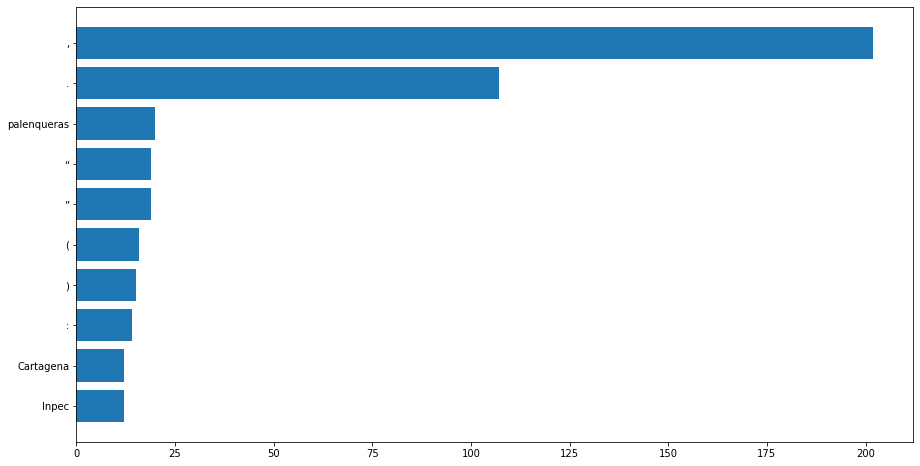

In [18]:
ni = 10

plt.figure(figsize = (15, 8))
plt.barh([ wi[0] for wi in frec_dist_filteredi.most_common(ni) ], [ wi[1] for wi in frec_dist_filteredi.most_common(ni) ])
plt.gca().invert_yaxis()

In [19]:
documenti = nlp(texti)
displacy.render(documenti, style = "ent")

In [20]:
#Judicial
textj

'Judicial Redacción Judicial Lo que ha dicho el Ejército sobre la cuestionada operación de Putumayo A pesar de denuncias de la comunidad, investigaciones periodísticas y dudas desde la Defensoría del Pueblo, la Fuerza Pública aún defiende el operativo que desplegó en zona rural de Puerto Leguízamo (Putumayo) el 28 de marzo. En la operación, que al parecer irrumpió en un bazar comunitario, murieron 11 personas: entre ellas, una mujer embarazada y un adolescente de 16 años. Las dudas crecen y la Fiscalía ya está investigando, pero mientras tanto, el Ejército y el Ministerio de Defensa han cerrado filas. Aunque su defensa del operativo no niega las posibles irregularidades, sino que en muchos casos las confirma. (En contexto: Las inconsistencias del operativo militar en Putumayo que cobró la vida de civiles) La mujer embarazada que murió en el operativo fue identificada como Ana María Sarrias, pareja de Divier Hernández, presidente de la junta de acción comunal del Alto Remanso, quien tam

In [21]:
frec_dist_filteredj.most_common(10)

[(',', 642),
 ('.', 324),
 (':', 94),
 ('“', 84),
 ('”', 80),
 ('Ejército', 70),
 ('operación', 58),
 ('(', 46),
 (')', 46),
 ('si', 34)]

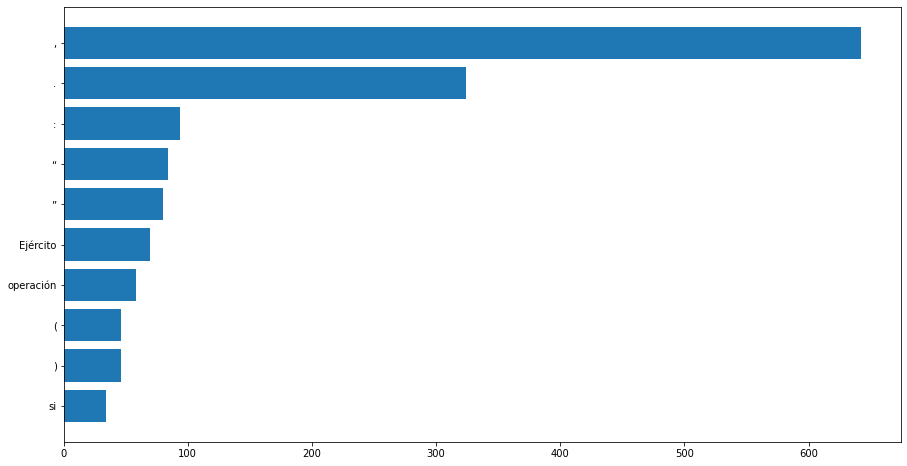

In [22]:
nj = 10

plt.figure(figsize = (15, 8))
plt.barh([ wj[0] for wj in frec_dist_filteredj.most_common(nj) ], [ wj[1] for wj in frec_dist_filteredj.most_common(nj) ])
plt.gca().invert_yaxis()

In [23]:
documentj = nlp(textj)
displacy.render(documentj, style = "ent")

In [24]:
#Politica
textp

'Politica Redacción Política Presidente Iván Duque se va en contra de Rusia en el Consejo de Seguridad Este martes se llevó a cabo una nueva sesión de Consejo de Seguridad de las Naciones Unidas para presentar el informe trimestral de la implementación del acuerdo de paz. En esta ocasión se contó con la presencia especial del presidente Iván Duque, que usó el espacio para hacer un cierre de cuentas de su política de Paz con Legalidad, que la mostró como su forma de llevar a cabo la implementación. Durante la sesión, delegaciones a nivel mundial expresaron algunas de sus preocupaciones por la implementación. Uno de los más críticos fue el representante de la Federación Rusa. Al finalizar la sesión, el primer mandatario pidió nuevamente la palabra para responder a cada una de las preocupaciones expresadas por los diplomáticos presentes, sobre todo al de la república euroasiática. El presidente agradeció a todos por las observaciones hechas ya que “muchas de las preocupaciones que se han 

In [25]:
frec_dist_filteredp.most_common(10)

[(',', 613),
 ('.', 416),
 ('”', 129),
 ('“', 127),
 ('mujeres', 82),
 (':', 66),
 ('recursos', 58),
 ('paz', 57),
 ('Duque', 49),
 ('presidente', 41)]

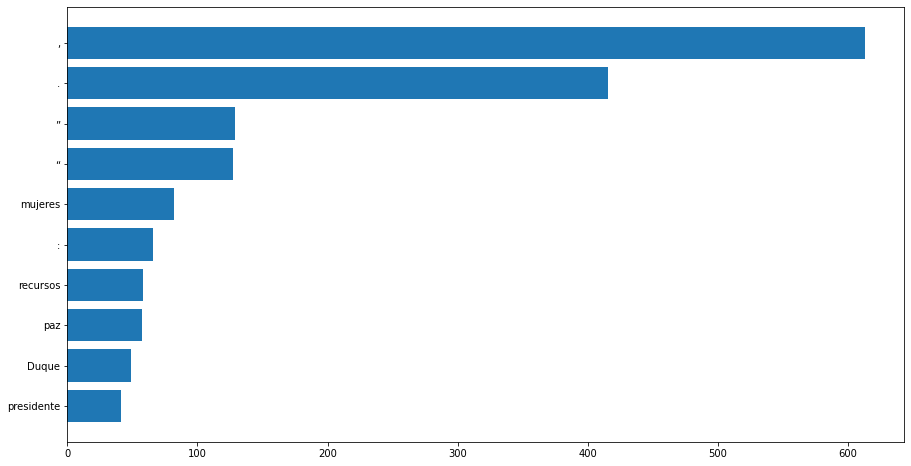

In [26]:
np = 10

plt.figure(figsize = (15, 8))
plt.barh([ wp[0] for wp in frec_dist_filteredp.most_common(np) ], [ wp[1] for wp in frec_dist_filteredp.most_common(np) ])
plt.gca().invert_yaxis()

In [27]:
documentp = nlp(textp)
displacy.render(documentp, style = "ent")

In [28]:
#Tecnologia
textt

'Politica Con información de agencias Nokia se suma a Ericsson y se retira del mercado ruso por la guerra de Ucrania La compañía finlandesa de telecomunicaciones Nokia anunció este martes que se retira del mercado ruso debido al conflicto bélico con Ucrania y a las sanciones impuestas por la Unión Europea (UE). Nokia, que en las últimas semanas ya había suspendido el suministro de equipos de redes móviles a Rusia, señaló en un comunicado que ha detenido el desarrollo de nuevos negocios y está trasladando sus actividades de investigación y desarrollo (I+D) fuera del país. "Ahora podemos anunciar que abandonamos el mercado ruso. Durante este proceso nuestra prioridad sigue siendo la seguridad y el bienestar de nuestros empleados", señaló la compañía. Lea también: Todos huyen: las principales empresas que se fueron de Rusia por guerra en Ucrania No obstante, Nokia seguirá brindando el soporte necesario para mantener las redes existentes "en cumplimiento de las sanciones actuales", a fin d

In [29]:
frec_dist_filteredt.most_common(10)

[(',', 132),
 ('.', 80),
 ('”', 29),
 ('“', 28),
 ('Musk', 21),
 ('Twitter', 19),
 (':', 16),
 ('millones', 16),
 ('Rusia', 13),
 ('Elon', 12)]

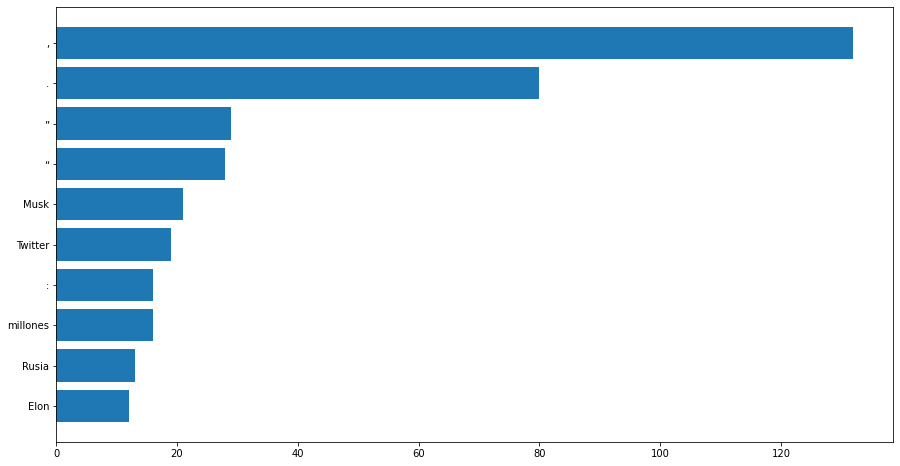

In [30]:
nt = 10

plt.figure(figsize = (15, 8))
plt.barh([ wt[0] for wt in frec_dist_filteredt.most_common(nt) ], [ wt[1] for wt in frec_dist_filteredt.most_common(nt) ])
plt.gca().invert_yaxis()

In [31]:
documentt = nlp(textt)
displacy.render(documentt, style = "ent")